# Paper figures

Here are all figures generated for the paper.

In [18]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 7.0)
mpl.style.use('ggplot')
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pgf', FigureCanvasPgf)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import sys, os
from os.path import join
sys.path.append("../tools/")
from collections import defaultdict

# Data management libraries
import pandas as pd
import scipy as sp
import scipy.stats

# Treebank utils, found in "../tools"
import udeval, udtree, lang_utils, dependency_classes

## STTR

,STTR,C freq,F freq
STTR,1.000000,0.226608,-0.518758
C freq,0.226608,1.000000,-0.859462
F freq,-0.518758,-0.859462,1.000000


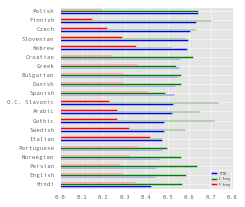

In [27]:
content_dist = pd.DataFrame.from_csv('../data/content_function_freq.csv')[["C freq", "F freq"]]
sttr = pd.DataFrame.from_csv('../data/standard_ttr.1.2.csv')
content_sttr = pd.concat([sttr['mean'], content_dist], axis=1)
renamed = content_sttr.rename(index={'Old_Church_Slavonic': 'O.C. Slavonic'}, 
                              columns={'mean': 'STTR', 0: "Content deprel ratio"})
renamed.sort_values('STTR').plot(kind='barh', figsize=(3.5, 3), fontsize=6)
plt.legend(fontsize=3, loc=4)
plt.tight_layout()
plt.savefig('../paper/figures/standard_ttr.pdf')
renamed.corr()

## Average word dependency entropy

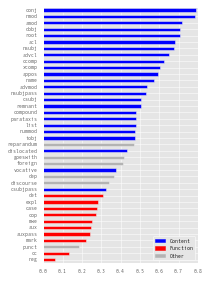

In [29]:
wde = pd.Series.from_csv('../data/function_content_degree.wde.csv')

from matplotlib.patches import Patch
colmap = {deprel: 'red' for deprel in dependency_classes.function_dependents}
colmap.update({deprel: 'blue' for deprel in dependency_classes.content_dependents})
colmap.update({deprel: (0.7, 0.7, 0.7) for deprel in dependency_classes.nonsemantic_dependents})
colors = list(map(lambda deprel: colmap[deprel], wde.sort_values(ascending=True).index))
fhandle = Patch(color='red', label='Function')
chandle = Patch(color='blue', label='Content')
ohandle = Patch(color=(0.7, 0.7, 0.7), label='Other')

ax = wde.sort_values(ascending=True).plot(kind='barh', fontsize=5, figsize=(3, 4), color=colors)
plt.legend(handles=[chandle, fhandle, ohandle], loc=4, fontsize=5)
plt.tight_layout()
plt.savefig('../paper/figures/word_dependency_entropy.pdf')


## Pearson correlation matrix

Manually boldfaced

In [36]:
lang_dist = pd.DataFrame.from_csv('../data/content_function_freq.csv').rename(columns={'Function freq': 'F freq', 
                                                                                       'Content freq': 'C freq'})
lang_measures = pd.DataFrame.from_csv('../data/maltdefault.lang_measures.csv').rename(columns={'Averaged WLAS': 'Avg WLAS'})
lang_measures = pd.concat([lang_measures, lang_dist], axis=1)
corrs = lang_measures.corr('pearson')
corrs = pd.DataFrame(np.triu(corrs, k=1), index=corrs.index, columns=corrs.columns).replace(0, "")
corrs = corrs.drop('WLAS', axis=1).drop('F freq', axis=0)
with open('../paper/tables/res_corrs.latex', 'w') as w:
    corrs.to_latex(buf=w, column_format="lrrrrrrrrr", float_format=lambda x: "{:.2f}".format(x))
corrs

,LAS,C prec,C rec,F prec,F rec,C freq,F freq
WLAS,0.984976,0.953885,0.969774,0.848273,0.845429,-0.579663,0.419373
LAS,,0.905814,0.922016,0.915696,0.917105,-0.667019,0.540836
C prec,,,0.990815,0.683544,0.698359,-0.336173,0.173818
C rec,,,,0.721002,0.717542,-0.38653,0.201736
F prec,,,,,0.982458,-0.773128,0.714104
F rec,,,,,,-0.767874,0.7116
C freq,,,,,,,-0.859462


## Maltdefault results

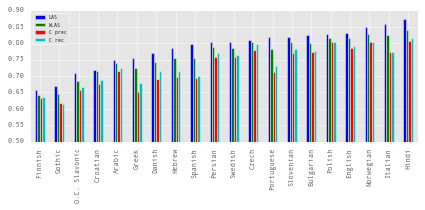

In [37]:
lang_measures = pd.DataFrame.from_csv('../data/maltdefault.lang_measures.csv')[['LAS', 'WLAS', 'C prec', 'C rec']]
lang_measures.rename(columns={0: 'LAS', 1: 'WLAS'}, inplace=True)
lang_measures.sort_values('LAS', inplace=True)
renamed = lang_measures.rename(index={'Old_Church_Slavonic': 'O.C. Slavonic'})
ax = renamed.plot(kind='bar', figsize=(6,3), fontsize=7, legend=False)
ax.legend(loc=2, fontsize=5)
plt.ylim(0.5, 0.9)
plt.tight_layout()
plt.savefig('../paper/figures/content_las_comparison.pdf')

## Cumulative variance

2     0.000075
3     0.000062
4     0.000090
5     0.000090
6     0.000148
7     0.000176
8     0.000195
9     0.000257
10    0.000302
11    0.000352
12    0.000544
13    0.000674
14    0.000858
15    0.000996
16    0.001212
17    0.001460
18    0.001929
19    0.002768
20    0.003472
Name: WLAS, dtype: float64

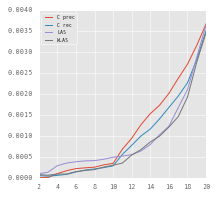

In [42]:
lang_measures = pd.DataFrame.from_csv('../data/maltdefault.lang_measures.csv')
vals = ["C prec", "C rec", "WLAS", "LAS"]
vars = {"C prec": [], "C rec": [], "LAS": [], "WLAS": []}
for val in vals:
    for i in range(2, len(lang_measures)+1):
        vars[val].append(lang_measures.sort_values(val, ascending=False)[val].ix[:i].var())

vars = pd.DataFrame(vars)
vars.index = range(2,len(lang_measures)+1)
vars.plot(figsize=(3,3), legend=False, fontsize=7)
plt.legend(fontsize=5, loc=2)
plt.savefig('../paper/figures/cumul_vars.pdf')
vars['WLAS']

## Human judgment scores

In [22]:
hujudg = pd.DataFrame.from_csv('../data/human_judgment_corr.csv')
# manual changes to file, so just making sure i don't run this by mistake
#with open('../paper/tables/human_judgment.latex', 'w') as w:
#    hujudg.to_latex(buf=w, column_format="lrrrr", float_format=lambda x: "{:.2f}".format(x))
hujudg

,Content precision,Content recall,LAS,WLAS
English,0.508442,0.581423,0.545157,0.546863
German,0.371537,0.437564,0.463736,0.463736
Spanish,0.448713,0.463425,0.490216,0.478960


## Cascading errors

In [39]:
errors = pd.DataFrame.from_csv('../data/maltdefault.cascading_errors.csv').rename(index={'Old_Church_Slavonic': 'O.C. Slavonic'},
                                                                                  columns={'Content labeled': 'C lab.',
                                                                                           'Content unlabeled': 'C unlab.',
                                                                                           'Function labeled': 'F lab.',
                                                                                           'Function unlabeled': 'F unlab.'})
with open('../paper/tables/cascading_errors.latex', 'w') as w:
    errors.to_latex(w, column_format="lrr|rr", float_format=lambda x: "{:.2f}".format(x))
errors

,C lab.,C unlab.,F lab.,F unlab.
Arabic,0.513789,0.563860,0.398017,0.489478
Bulgarian,0.552858,0.548533,0.506596,0.559701
Croatian,0.474149,0.459615,0.318436,0.267606
Czech,0.486107,0.457754,0.371002,0.354005
Danish,0.407881,0.401361,0.233010,0.246154
English,0.477665,0.438391,0.329310,0.363806
Finnish,0.391100,0.376749,0.246106,0.289116
Gothic,0.369090,0.325050,0.311284,0.368421
Greek,0.443193,0.433289,0.308550,0.333333
Hebrew,0.508979,0.543077,0.332308,0.466216
